<h2 style="text-align: center;">Qualidade de Vinhos: Uma Análise Estatística e Preditiva</h2>

### Em breve a descrição

## 1. Carregamento de Bibliotecas e Conjunto de Dados

In [2]:
# Importa as bibliotecas necessárias
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# Faz a leitura dos datasets winequality-red.csv, acerca da qualidade dos vinhos tintos, e winequality-white.csv, acerca dos vinhos brancos
red_data = pd.read_csv("../data/winequality-red.csv", sep = ';')
white_data = pd.read_csv("../data/winequality-white.csv", sep = ';')

# Cria a coluna wine_type para cada um dos datasets acima, com suas respectivas cores ("red" ou "white")
red_data['wine_type'] = "red"
white_data['wine_type'] = "white"

# Junta os dois datasets num só, denominado wine_data, e exibe suas primeiras 5 linhas
wine_data = pd.concat([red_data, white_data], ignore_index = True)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


A amostra acima apresenta as primeiras cinco entradas do conjunto completo de dados, wine_data, que contém informações tanto sobre vinhos tintos quanto brancos. Cada linha representa uma observação individual (um vinho), com diversas características físico-químicas, como acidez, açúcar residual, pH, concentração de sulfatos, entre outras.

Foi adicionada também a coluna wine_type, que indica se o vinho é tinto (red) ou branco (white), o que facilitará comparações entre os dois tipos ao longo da análise.

A variável quality representa a qualidade sensorial atribuída ao vinho, em uma escala de 0 a 10, e será utilizada como nossa variável alvo em modelos de aprendizado de máquina.

## 2. Análise Exploratória dos Dados

### 2.1. Visão Geral do Dataset

In [23]:
# Imprime os shapes dos datasets individuais (red_data e white_data)
print(f"O dataset sobre os vinhos tintos, red_data, possui {red_data.shape[0]} linhas, enquanto o dataset sobre vinhos brancos, white_data, possui {white_data.shape[0]} linhas.\n"
      f"Ambos possuem 13 colunas.")

O dataset sobre os vinhos tintos, red_data, possui 1599 linhas, enquanto o dataset sobre vinhos brancos, white_data, possui 4898 linhas.
Ambos possuem 13 colunas.


In [ ]:
# Imprime o shape do dataset completo, wine_data
wine_data.shape

(5320, 13)

In [6]:
# Imprime as colunas do dataset 
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

### 2.2. Análise de Entradas Duplicadas
Após a concatenação dos dados dos vinhos tintos e brancos, é importante verificar se há entradas duplicadas. A presença de tais entradas pode enviesar análises estatísticas e modelos preditivos, o que almejamos evitar.

In [24]:
# Verifica a quantidade de entradas duplicadas
duplicatas = wine_data.duplicated()
print(f"O número de entradas duplicadas é: {duplicatas.sum()}.")

# Remove as entradas duplicadas
wine_data = wine_data.drop_duplicates()
print(f"Após a remoção das entradas duplicadas, o shape do dataset é {wine_data.shape}.")

O número de entradas duplicadas é: 0.
Após a remoção das entradas duplicadas, o shape do dataset é (5320, 13).


### 2.3. Distribuição da Variável de Resposta `quality`

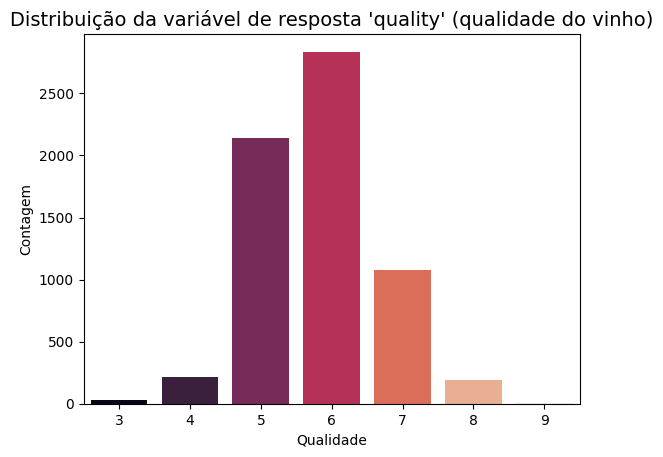

In [8]:
# Distribuição da qualidade no dataset completo
sns.countplot(data = wine_data, x = 'quality', hue = 'quality', palette = 'rocket', legend = False)
plt.title("Distribuição da variável de resposta 'quality' (qualidade do vinho)", fontsize = 14)
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()

In [9]:
wine_data['wine_type'].unique()

array(['red', 'white'], dtype=object)

A distribuição da variável de resposta `quality` revela que a maioria dos vinhos no conjunto de dados é classificada com notas **5, 6 e 7**, com destaque para a qualidade 6, que apresenta a maior contagem. Há poucas amostras com qualidade muito baixa (3 e 4) ou muito alta (8 e 9), o que indica uma **assimetria** nas classes.  
A seguir, analisemos a distribuição da variável de resposta para cada tipo de vinho.

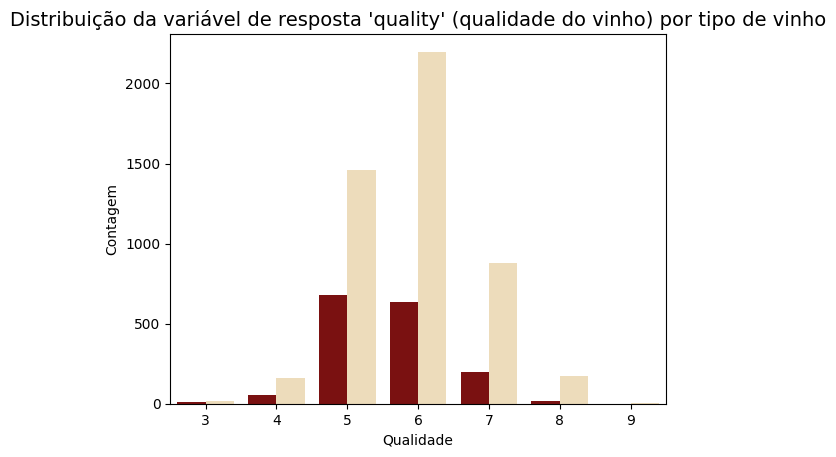

In [10]:
# Distribuição da qualidade por tipo de vinho

# Define as cores dos vinhos
cores_vinhos = {"red": "#8B0000",   # vinho tinto (vermelho escuro)
                "white": "#F5DEB3"}

# Gráfico com as cores definidas acima
sns.countplot(data = wine_data, x = 'quality', hue = 'wine_type', palette = cores_vinhos, legend = False)
plt.title("Distribuição da variável de resposta 'quality' (qualidade do vinho) por tipo de vinho", fontsize = 14)
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()

Com base no gráfico acima, inferimos que a quantidade de vinhos brancos com qualidade mais alta (valores de `quality` iguais a 7, 8 e 9) é maior do que a de vinhos tintos. Isso já era esperado, dado que o dataset dos vinhos brancos é significativamente maior do que o do dataset dos vinhos tintos; com efeito, 4898 linhas contra 1599.  
Embora a presença de mais vinhos brancos no conjunto de dados explique parcialmente essa diferença na qualidade, uma análise mais cuidadosa é necessária.  
No entanto, embora a maior presença de vinhos brancos justifique parcialmente esse padrão, é necessário investigar se a distribuição relativa da qualidade difere entre os tipos.
Para isso, vamos analisar a proporção de cada valor de qualidade dentro de cada tipo de vinho.  

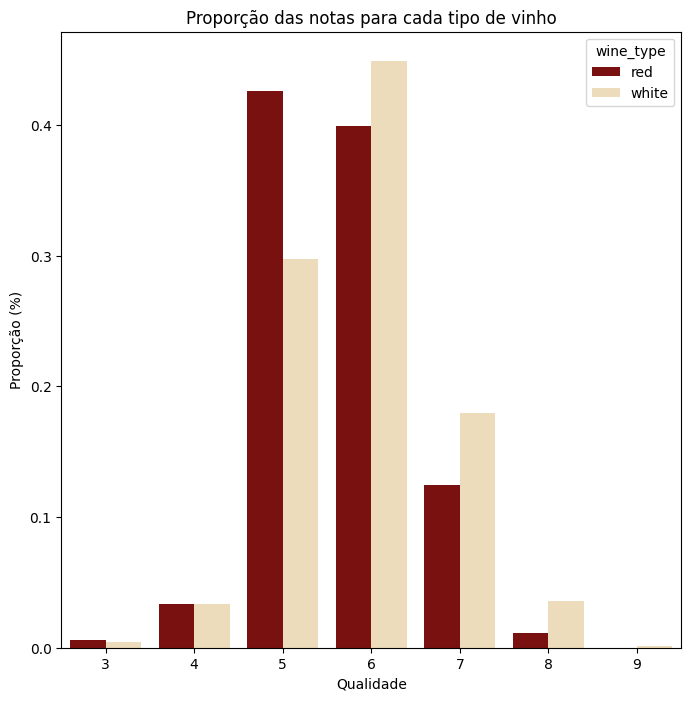

In [11]:
# Cria uma tabela com as proporções relativas de cada nível da variável 'quality', separadas por tipo de vinho
quality_proportion = wine_data.groupby('wine_type')['quality'].value_counts(normalize = True).rename('Proporção').reset_index()

plt.figure(figsize = (8, 8))
sns.barplot(data = quality_proportion, x = 'quality', y = 'Proporção', hue = 'wine_type', palette = cores_vinhos)
plt.title('Proporção das notas para cada tipo de vinho')
plt.xlabel('Qualidade')
plt.ylabel('Proporção (%)')
plt.show()

In [12]:
# Média e desvio padrão
wine_data.groupby('wine_type')['quality'].agg(['mean', 'std'])

,mean,std
wine_type,,
red,5.636023,0.807569
white,5.877909,0.885639


Com base na média (mean) e no desvio padrão (std) da qualidade (`quality`) para cada tipo de vinho, observamos que:

- Vinhos brancos têm, em média, uma qualidade ligeiramente superior aos vinhos tintos  
  (média de 5.88 contra 5.64).
- A variabilidade da qualidade também é um pouco maior nos vinhos brancos  
  (desvio padrão de 0.89, para os vinhos brancos, contra 0.81 dos tintos).

Essas observações sugerem que, mesmo considerando a diferença de quantidade entre os dois tipos no conjunto de dados, os vinhos brancos tendem a ter uma qualidade mais elevada.

### 2.4. Teste de Hipótese: Diferença na Qualidade entre Vinhos Tintos e Brancos

Ainda que a média da variável `quality` seja ligeiramente maior nos vinhos brancos em comparação com os tintos, é importante avaliar se essa diferença é **estatisticamente significativa**. Façamos isso utilizando o **teste $t$ de Student** para duas amostras independentes, assumindo variâncias desiguais (teste $t$ de Welch).  
Façamos um breve outline do teste de hipótese: 

#### Hipóteses:

- **Hipótese nula ($\text{H}_0$):**  
  As médias da qualidade dos vinhos tintos e brancos são iguais.  
  $H_0: \mu_{\text{tinto}} = \mu_{\text{branco}}$

- **Hipótese alternativa ($\text{H}_a$):**  
  As médias da qualidade dos vinhos tintos e brancos são diferentes.  
  $H_1: \mu_{\text{tinto}} \ne \mu_{\text{branco}}$

#### Premissas do teste:

- As duas amostras (vinhos tintos e vinhos brancos) são independentes.
- A variável analisada (qualidade) é aproximadamente contínua e segue uma distribuição aproximadamente normal em cada grupo.
- Como verificamos que as variâncias são diferentes, utilizamos a versão do teste que **não assume homogeneidade de variância** (`usevar = 'unequal'`), ou seja, o **teste de Welch**.

#### Interpretação do p-valor

Se o **p-valor** for menor que o nível de significância adotado (< 0.05, por exemplo), **rejeitamos a hipótese nula**, indicando evidência estatística de que as médias diferem significativamente.

#### Adendo sobre a premissa de uma distribuição aproximadamente normal
Embora o teste t de Student assuma que os dados seguem uma distribuição normal, essa premissa pode ser relaxada quando lidamos com amostras grandes, graças ao Teorema do Limite Central. Como nosso conjunto de dados possui 5320 observações após a remoção de duplicatas, podemos considerar que a distribuição das médias amostrais se aproxima de uma distribuição normal.  
Portanto, ainda que as distribuições individuais de qualidade não sejam perfeitamente normais, a aplicação do teste t ainda é válida neste contexto.


In [29]:
# Separação dos dados de qualidade por tipo de vinho
red_quality = wine_data[wine_data['wine_type'] == 'red']['quality']
white_quality = wine_data[wine_data['wine_type'] == 'white']['quality']

# Calcula as variâncias da qualidade dos vinhos tintos e brancos
red_var, white_var = red_quality.var(), white_quality.var()
print(f"A variância da qualidade dos vinhos tintos é {float(red_var):.4f}, enquanto a dos vinhos brancos é {float(white_var):.4f}.")

A variância da qualidade dos vinhos tintos é 0.6783, enquanto a dos vinhos brancos é 0.7933.


Como as variâncias das amostras são diferentes, aplicamos o teste $t$ de Welch:

In [30]:
# Importa a função ttest_ind da biblioteca statsmodels, para a realização do teste t de Student para duas amostras independentes
from statsmodels.stats.weightstats import ttest_ind

# Aplica o teste t de Student para variâncias desiguais (usevar = 'unequal') e desempacota a tripla de resultado em t_stat (t-estatística), p_value (p-valor) e df (graus de liberdade)
t_stat, p_value, df = ttest_ind(red_quality, white_quality, usevar = 'unequal')

print(f"t-estatística: {t_stat:.4f}.")
print(f"p-valor: {p_value:.4f}.")
print(f"Graus de liberdade: {df:.2f}.")

t-estatística: -8.7568.
p-valor: 0.0000.
Graus de liberdade: 2527.02.


### Conclusão: Evidência de diferença estatisticamente significativa entre as médias de qualidade dos dois tipos de vinho

Segundo os resultados do teste t de Student, a t-estatística foi de aproximadamente - 10.15, com p-valor praticamente nulo, e cerca de 2950 graus de liberdade.
Diante disso, como o p-valor é notadamente menor do que o nível de significância adotado ($\alpha = 0.05$), rejeitamos a hipótese nula $\text{H}_0$ de que as médias das qualidades dos vinhos tintos e brancos são iguais.

Observando as médias amostrais — aproximadamente 5.88 para os vinhos brancos e 5.64 para os tintos — inferimos que, em média, os vinhos brancos apresentam uma qualidade superior aos tintos, segundo este conjunto de dados.

### 2.5. Estatísticas Descritivas e Análise de Correlação

Verifiquemos as correlações entre as variáveis numéricas do conjunto de dados, buscando relações que possam influenciar na variável alvo `quality`.  
Convém relembrar a definição precisa de correlação entre as variáveis aleatórias $X$ e $Y$:  
Dadas variáveis aleatórias $X$ e $Y$, sua correlação, $\rho(X,\,Y)$, é definida por 

\begin{equation*}
\rho(X,\,Y) = \frac{\text{Cov}(X,\,Y)}{\sigma_X \, \sigma_Y},
\end{equation*}

em que $\text{Cov}(X,\,Y) = E[(X - \mu_X)(Y - \mu_Y)]$ denota a covariância entre $X$ e $Y$, com $\mu_X$ e $\mu_Y$ denotando suas respectivas médias, e $\sigma_X$ e $\sigma_Y$ seus desvios padrão.

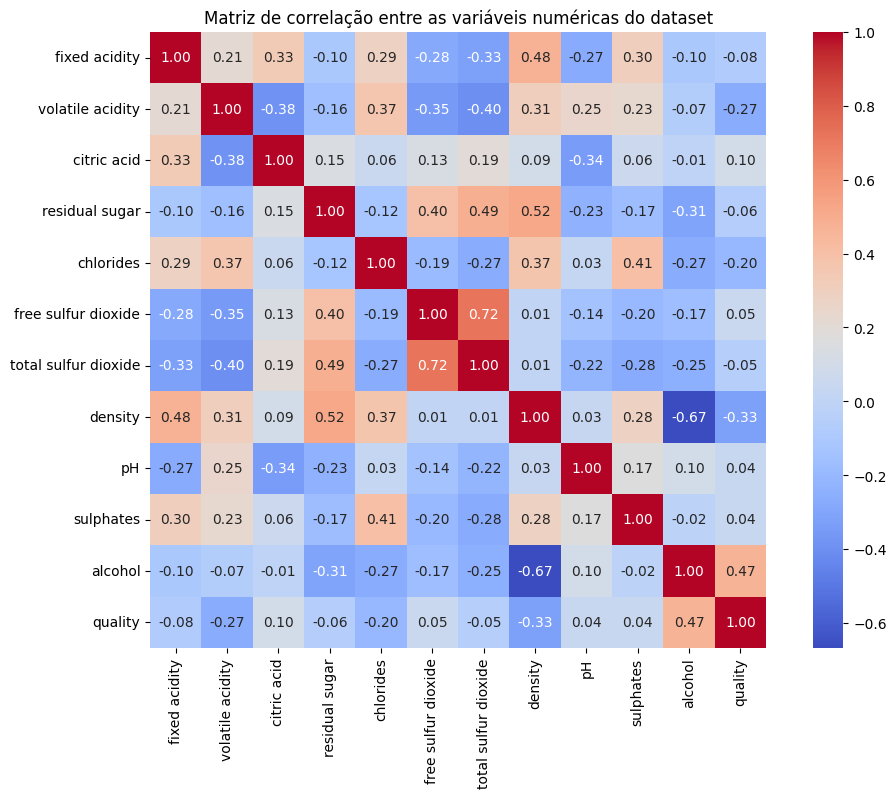

In [33]:
# Computa a matriz de correlação
corr_matrix = wine_data.corr(numeric_only = True)

# Exibe o mapa de calor das correlações
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', square = True)
plt.title('Matriz de correlação entre as variáveis numéricas do dataset')
plt.show()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884
